In [1]:
using DifferentialEquations, Plots, LinearAlgebra, LaTeXStrings

# Defaults for plotting 
plot_font = "Computer Modern";
default(fontfamily=plot_font,framestyle=:box, label=nothing, grid=false, tickfontsize=7)
scalefontsizes(1.3)

# Source https://blog.gwlab.page/solving-1-d-schrodinger-equation-in-python-dcb3518ce454

In [25]:
# Params & Grid 

T0 = 17
Nt = 100
t = (0:Nt)T0/Nt
N = 500 # Dimensionality --> 
xMax = 15 # Spatial extension
x = 2*(-N÷2:N÷2-1)xMax/N # Spatial vector
Δx = x[2]-x[1] # Spatial precision
;

In [26]:
# Constants

# Normalized
ħ=1 # Planck's contant over 2π
k=1 # Spring stiffness
m=1 # Mass
ω=sqrt(k/m) # Angular frequency
;

In [27]:
# Functions 

# Potential (normalized)
function harmonic(x) 
    @. 0.5x^2
end

# Normlization
norm(x)  = x./maximum(abs.(x))
;

In [28]:
V = Diagonal(harmonic(x))
T = Tridiagonal(-1.0*ones(N-1), 2.0 * ones(N), -1.0 * ones(N-1))./(2Δx^2)

# N*N Hamiltonian matrix based on Finite Difference Method
H = T .+ V

# IVP
function model!(du,u,p,t)
    du .= (0.5im * ħ / m ) .* ( H * u )
end

model! (generic function with 1 method)

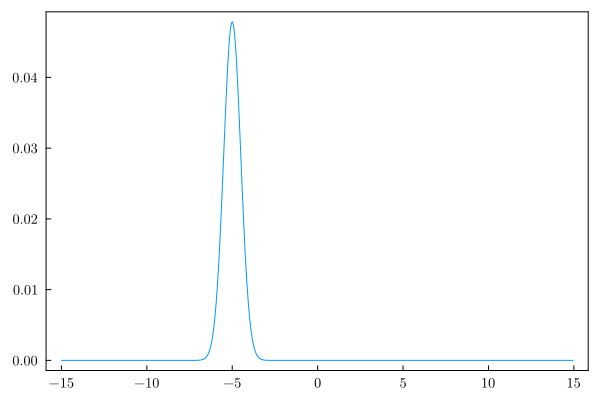

In [53]:
# Initial condition
psi0 = @. exp(-(x+5)^2) + 0.0im
psi0 =  psi0/ sqrt(sum(abs2.(psi0)));

plot(x,abs2.(psi0))


In [54]:
# Integration
prob = ODEProblem(model!, psi0, (0,T0))
sol = solve(prob, alg=Heun(), saveat=T0/Nt);

┌ Info: Saved animation to e:\DEV\GitHub\julia_numerical_methods\Finite_difference_method\anim.gif
└ @ Plots C:\Users\brian\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("e:\\DEV\\GitHub\\julia_numerical_methods\\Finite_difference_method\\anim.gif")
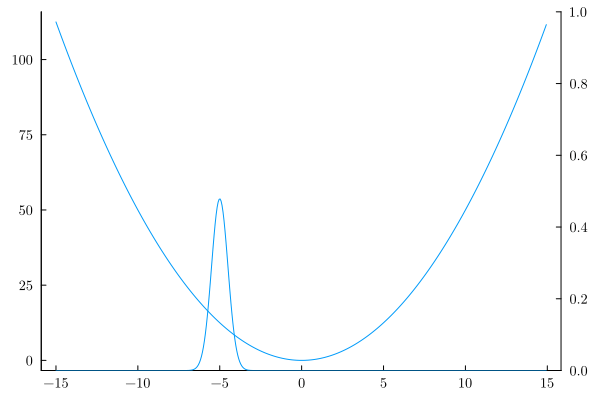

In [59]:


anim = @animate for tt ∈ t
    s = sol(tt)
    p1=plot(x,harmonic(x))
    p2=twinx(p1)
    plot!(p2,x,10*abs2.(s))
    plot!(p2, ylims=(0,1))
end;
gif(anim, "anim.gif")